In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sns.set_theme("talk")
sns.set_style("whitegrid")

In [5]:
rng = np.random.default_rng(1234)

In [201]:
x1 = rng.normal(-3, 1.25, 100)
x2 = rng.normal(2, 1.5, 100)
x3 = rng.normal(10, 3, 100)
x4 = rng.normal(20, 1.5, 100)

df = pd.DataFrame.from_dict({"t1": x1, "t2": x2, "t3": x3, "t4": x4})

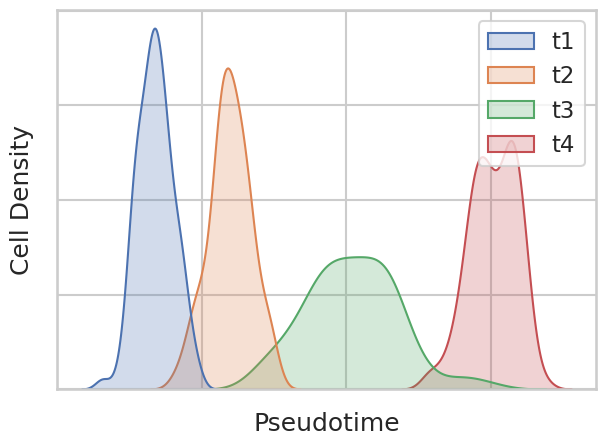

In [202]:
ax = sns.kdeplot(df, fill=True)
ax.set_xlabel("Pseudotime")
ax.set_ylabel("Cell Density")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# save
ax.figure.tight_layout()
ax.figure.savefig("distribution.png")

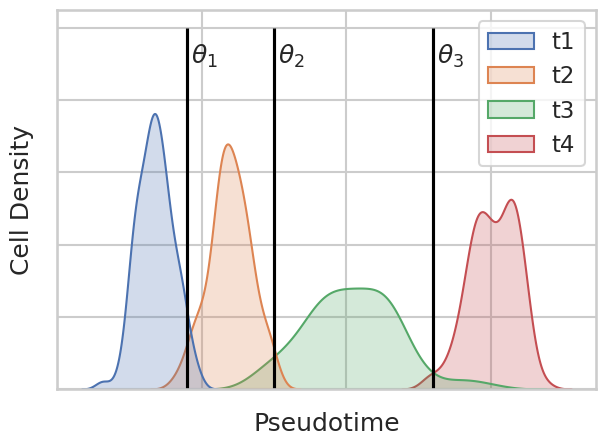

In [279]:
thresholds = [-1, 5, 16]
thresh_color = "black"

ax = sns.kdeplot(df, fill=True)
ax.vlines(thresholds, ymin=0, ymax=0.1, color=thresh_color)
for i, t in enumerate(thresholds):
    ax.text(t + 0.25, 0.09, r"$\theta_{%s}$" % (i+1))

ax.set_xlabel("Pseudotime")
ax.set_ylabel("Cell Density")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# save
ax.figure.tight_layout()
ax.figure.savefig("distribution_withthresh.png")

In [204]:
df2 = df.unstack().reset_index().drop("level_1", axis="columns")
df2.columns = ["Timepoint", "x"]
df2["prediction"] = 1
df2.loc[df2["Timepoint"] == "t1", "prediction"] = 0

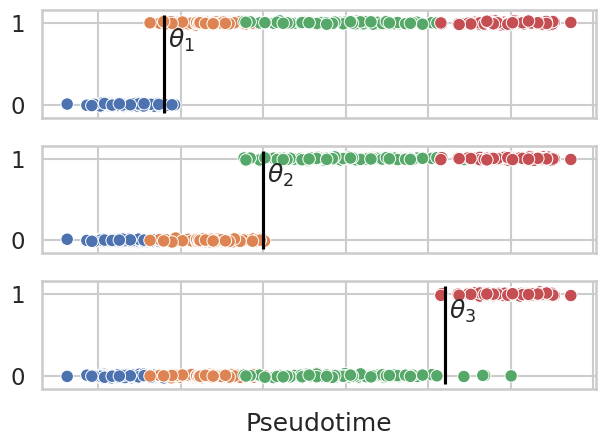

In [280]:
timepoints = ["t1", "t2", "t3", "t4"]

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

for i, ax in enumerate(axes):

    # reset "predictions
    df2["prediction"] = 1

    for j, t in enumerate(timepoints):
        if j <= i:
            df2.loc[df2["Timepoint"] == t, "prediction"] = 0
    
    noise = rng.normal(0, 0.01, df2.shape[0])
    df2.prediction += noise

    sns.scatterplot(df2, x="x", y="prediction", hue="Timepoint", ax=ax)
    ax.vlines(thresholds[i], ymin=-0.1, ymax=1.1, color=thresh_color)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticks([0,1])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.get_legend().remove()

    ax.text(thresholds[i] + 0.25, 0.7, r"$\theta_{%s}$" % (i+1))

ax.set_xlabel("Pseudotime")

fig.tight_layout()
fig.savefig("thresholds.png")

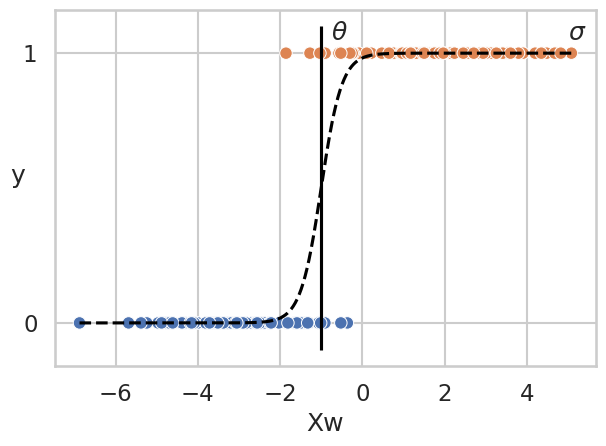

In [245]:
df2["prediction"] = 1
df2.loc[df2["Timepoint"] == "t1", "prediction"] = 0

ax = sns.scatterplot(df2.loc[df2.Timepoint.isin(["t1", "t2"])], x="x", y="prediction", hue="Timepoint")
ax.vlines(thresholds[0], ymin=-0.1, ymax=1.1, color=thresh_color)

# plot sigmoid
x = np.linspace(min(df2.loc[df2.Timepoint == "t1"].x),
                max(df2.loc[df2.Timepoint == "t2"].x),
               1000)
y = 1 / (1 +   np.exp(-x * 4 + thresholds[0] * 4))
ax.plot(x,y, color="black", linestyle="--")

ax.set_xlabel("Xw")
ax.set_ylabel("y")
ax.yaxis.get_label().set_rotation(0)

ax.text(thresholds[0] + 0.25, 1.05, r"$\theta$")
ax.text(5, 1.05, r"$\sigma$")

ax.get_legend().remove()

ax.set_yticks([0,1])

ax.get_figure().tight_layout()
ax.get_figure().savefig("sigmoid_function.png")

In [255]:
from matplotlib import patches
fig = plt.figure(figsize=(12,8))
patches.Rectangle((0,0), 1, 1, figure=fig)

<Figure size 1200x800 with 0 Axes>

In [267]:
#import scanpy as sc
#import os

#DATA_DIR = "/home/julian/Uni/MasterThesis/data/"
#corona_ann = sc.read_h5ad(os.path.join(DATA_DIR, "COVAC_POSTQC.h5ad"))

/tmp/ipykernel_57249/97108698.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_b_samples_by_timepoint = corona_ann[corona_ann.obs.cohort == "B"].obs.copy().groupby(["timepoint"])["patientID"].agg(["nunique"]).reset_index()
/tmp/ipykernel_57249/97108698.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_p_samples_by_timepoint = corona_ann[corona_ann.obs.cohort == "P"].obs.copy().groupby(["timepoint"])["patientID"].agg(["nunique"]).reset_index()


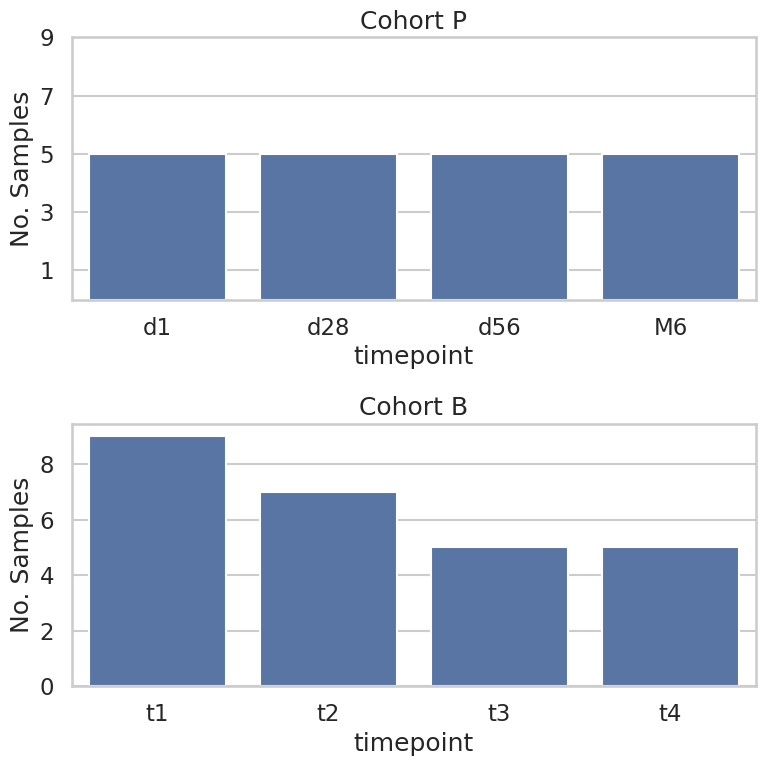

In [273]:
corona_ann.obs.timepoint = pd.Categorical(corona_ann.obs.timepoint, 
                                          categories=["t1","t2", "t3", "t4", "d1", "d28", "d56", "M6"], 
                                          ordered=True)

cohort_b_samples_by_timepoint = corona_ann[corona_ann.obs.cohort == "B"].obs.copy().groupby(["timepoint"])["patientID"].agg(["nunique"]).reset_index()
cohort_p_samples_by_timepoint = corona_ann[corona_ann.obs.cohort == "P"].obs.copy().groupby(["timepoint"])["patientID"].agg(["nunique"]).reset_index()

fig, ((a1), (a2)) = plt.subplots(nrows=2, ncols=1, figsize=(8,8), sharey=False)

sns.barplot(cohort_p_samples_by_timepoint, x="timepoint", y="nunique", ax=a1)
sns.barplot(cohort_b_samples_by_timepoint, x="timepoint", y="nunique", ax=a2)

a1.set_title("Cohort P")
a2.set_title("Cohort B")
a2.set_ylabel("No. Samples")
a1.set_ylabel("No. Samples")

a1.set_yticks([1,3,5,7,9])
fig.tight_layout()
fig.savefig("num_samples_by_timepoint.png")

In [19]:
columns = ["Acinar", "Beta", "Germline*", "ESC", "MEF*"]
acc_py_means = [84.57, 85.86, 68.25, 89.68, 99.68]
acc_py_sd = [0.1, 1.6, 0, 1.7, 0]
acc_r_means = [81.8, 97.91, 66.45, 99.7, 98.07]
acc_r_sd = [0.7, 0.6, 2.8, 0.2, 0.7]

sparsity_py_means = [97.97, 99.03, 97.1, 99.43, 98.53]
sparsity_py_sd = [0.2,0.0,0.0, 0.0,0.0]
sparsity_r_means = [98.52, 98.41, 96.93, 95.19, 98.69]
sparsity_r_sd = [0.1, 0.1, 0.1, 0.1, 0.1]

df = pd.DataFrame.from_dict({
    "dataset": columns + columns,
    "implementation": ["Py"]*5 + ["R"]*5,
    "acc_mean": acc_py_means + acc_r_means,
    "acc_sd": acc_py_sd + acc_r_sd,
    "sparsity_mean": sparsity_py_means + sparsity_r_means,
    "sparsity_sd": sparsity_py_sd + sparsity_r_sd
})

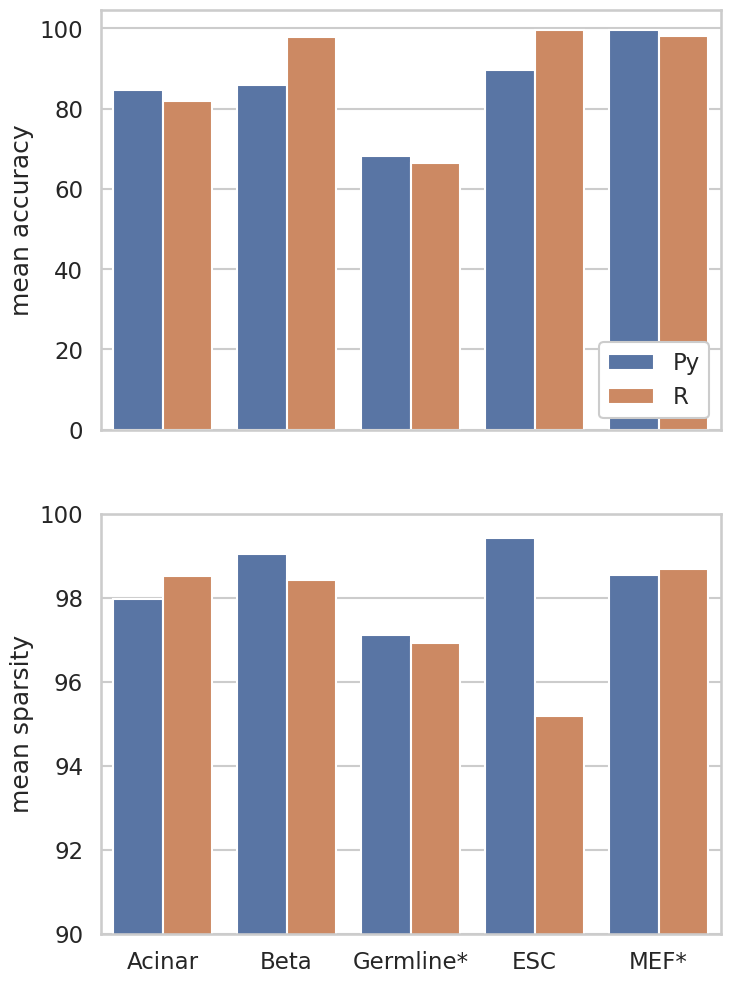

In [27]:
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(8,12), sharex=True, sharey=False)

sns.barplot(x="dataset", y="acc_mean", hue="implementation", data=df, ax=ax1)
ax1.legend(loc="lower right", framealpha=1)
ax1.set_ylabel("mean accuracy")

sns.barplot(x="dataset", y="sparsity_mean", hue="implementation", data=df, ax=ax2)
ax2.set_ylim((90,100))
ax2.get_legend().remove()
ax2.set_ylabel("mean sparsity")
ax2.set_xlabel("")

fig.savefig("comparison_published_bars.png")